In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Input, UpSampling2D, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
!unzip images.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: train/pa/pa_original_pa30.mine3.r5.png_2aa0ead9-028e-47f4-8703-89af0eeb1488.png  
  inflating: train/pa/pa_original_pa30.mine3.r5.png_64e22aa1-11b4-4fba-8f53-9c1108d35c3c.png  
  inflating: train/pa/pa_original_pa30.mine3.r5.png_79b2b461-15bb-42d8-94fa-9ab7ae3c70ef.png  
  inflating: train/pa/pa_original_pa30.mine3.r5.png_dc4c576a-82ec-425a-9923-66442709582b.png  
  inflating: train/pa/pa_original_pa30.mine3.rm10.png_64511de8-6e01-4e99-b2b7-ad3f7a037be8.png  
  inflating: train/pa/pa_original_pa30.mine3.rm10.png_6d759676-bba4-4c7b-9e2a-ae727f618532.png  
  inflating: train/pa/pa_original_pa30.mine3.rm10.png_fb67e1e0-83bc-4de0-8c94-8c7a6eb4d142.png  
  inflating: train/pa/pa_original_pa30.mine3.rm5.png_84dc00dc-57ca-4057-9691-edf1adb35819.png  
  inflating: train/pa/pa_original_pa30.mine3.rm5.png_bafe9a10-c835-4934-a2ef-e4fcc27b40b6.png  
  inflating: train/pa/pa_original_pa31.mine.b.png_1466fa72-f6b3-44a8-9f83-b284

In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)
# Generator data training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Generator data validasi
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 8400 images belonging to 20 classes.
Found 2400 images belonging to 20 classes.


In [ ]:
labels = train_generator.class_indices
print(labels)

{'ba': 0, 'ca': 1, 'da': 2, 'dha': 3, 'ga': 4, 'ha': 5, 'ja': 6, 'ka': 7, 'la': 8, 'ma': 9, 'na': 10, 'nga': 11, 'nya': 12, 'pa': 13, 'ra': 14, 'sa': 15, 'ta': 16, 'tha': 17, 'wa': 18, 'ya': 19}


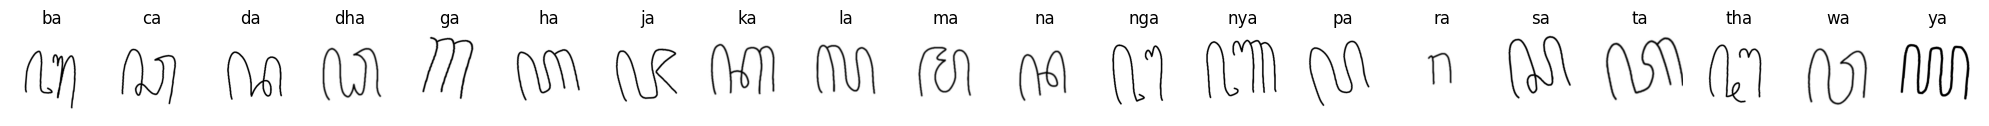

In [ ]:
def plot_gambar_asli(data_dir, labels):
    num_classes = len(labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 20))
    axes = axes.flatten()

    for idx, (class_name, class_index) in enumerate(labels.items()):
        image_dir = os.path.join(data_dir, class_name)
        image_path = os.path.join(image_dir, os.listdir(image_dir)[5])
        image = plt.imread(image_path)

        axes[idx].imshow(image)
        axes[idx].set_title(class_name)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

plot_gambar_asli(train_dir, labels)

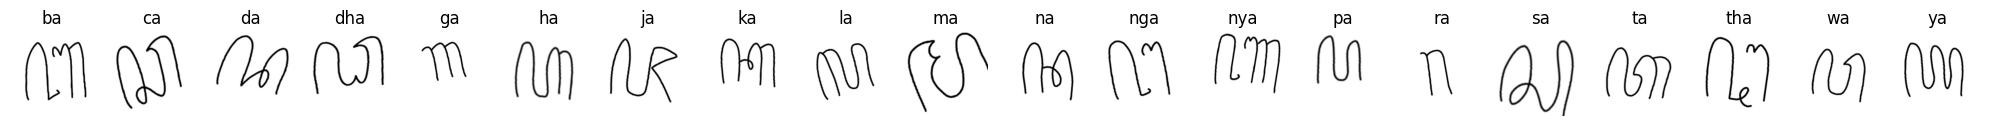

In [ ]:
def plot_gambar_asli(data_dir, labels):
    num_classes = len(labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 20))
    axes = axes.flatten()

    for idx, (class_name, class_index) in enumerate(labels.items()):
        image_dir = os.path.join(data_dir, class_name)
        image_path = os.path.join(image_dir, os.listdir(image_dir)[5])
        image = plt.imread(image_path)

        axes[idx].imshow(image)
        axes[idx].set_title(class_name)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

plot_gambar_asli(val_dir, labels)

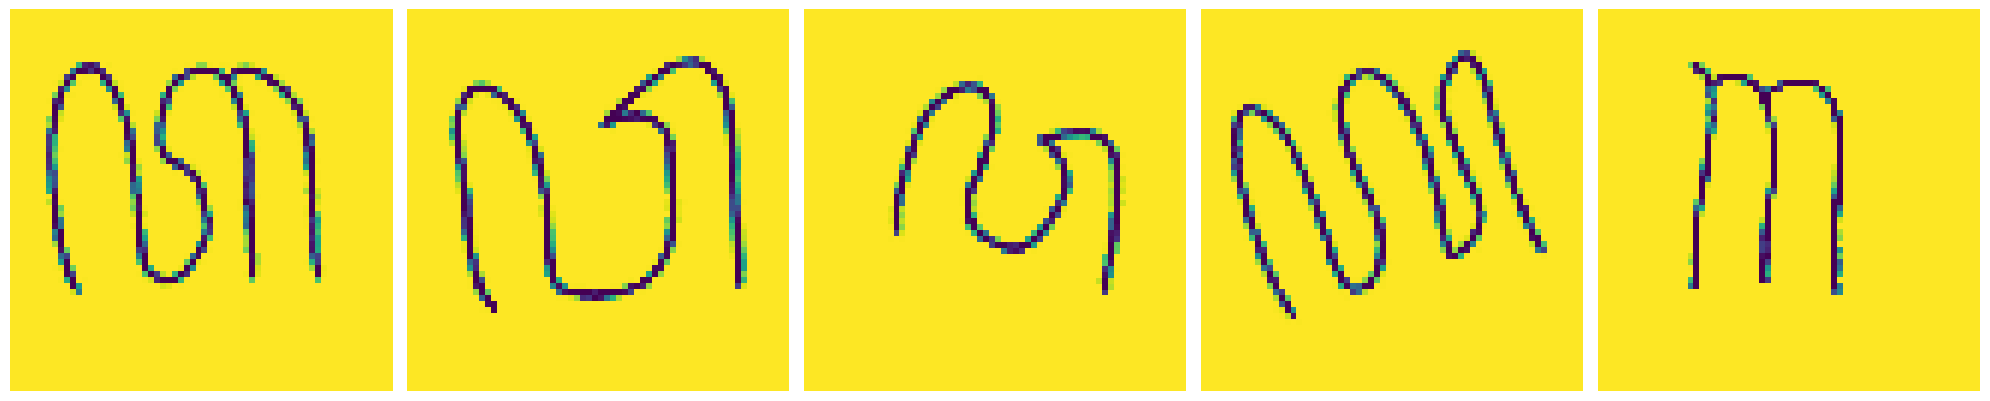

In [ ]:
def plot_gambar_augmentasi(generator):
    x_batch, y_batch = next(generator)

    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()

    for img, ax in zip(x_batch, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_gambar_augmentasi(train_generator)

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.97 and logs.get('val_accuracy') >= 0.96:
            print("\nTraining stopped as accuracy and val_accuracy have reached 97% and 96%")
            self.model.stop_training = True

In [ ]:
kelompok7_callback = CustomCallback()

In [ ]:
def create_cnn(input_shape=(64, 64, 1), num_classes=20):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

cnn = create_cnn()

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)        

In [ ]:
history_cnn = cnn.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[kelompok7_callback]
)

Epoch 1/50
263/263 [==============================] - 70s 262ms/step - loss: 2.9934 - accuracy: 0.0490 - val_loss: 2.8779 - val_accuracy: 0.1562
Epoch 2/50
263/263 [==============================] - 65s 249ms/step - loss: 2.1570 - accuracy: 0.3111 - val_loss: 1.3196 - val_accuracy: 0.6250
Epoch 3/50
263/263 [==============================] - 70s 264ms/step - loss: 1.2563 - accuracy: 0.5708 - val_loss: 0.7337 - val_accuracy: 0.7975
Epoch 4/50
263/263 [==============================] - 68s 258ms/step - loss: 0.8550 - accuracy: 0.7037 - val_loss: 0.5387 - val_accuracy: 0.8400
Epoch 5/50
263/263 [==============================] - 69s 263ms/step - loss: 0.6312 - accuracy: 0.7832 - val_loss: 0.4558 - val_accuracy: 0.8854
Epoch 6/50
263/263 [==============================] - 71s 271ms/step - loss: 0.5136 - accuracy: 0.8271 - val_loss: 0.3567 - val_accuracy: 0.8908
Epoch 7/50
263/263 [==============================] - 69s 264ms/step - loss: 0.4389 - accuracy: 0.8543 - val_loss: 0.3001 - val_ac

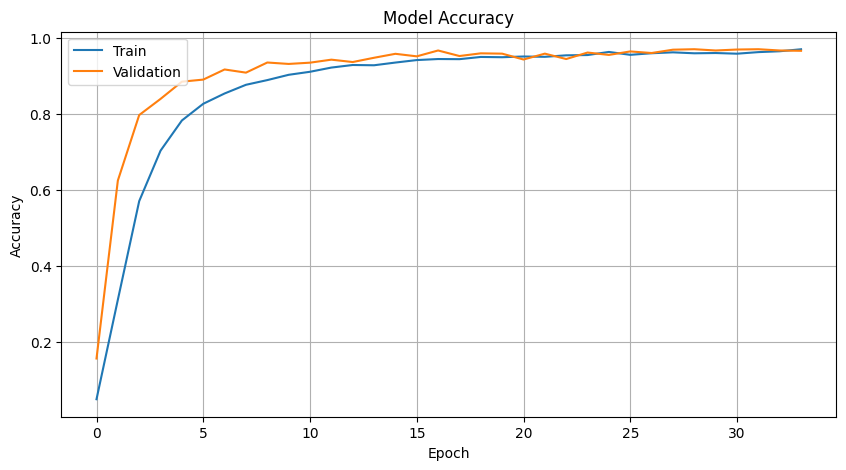

In [ ]:
import matplotlib.pyplot as plt

history = history_cnn.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


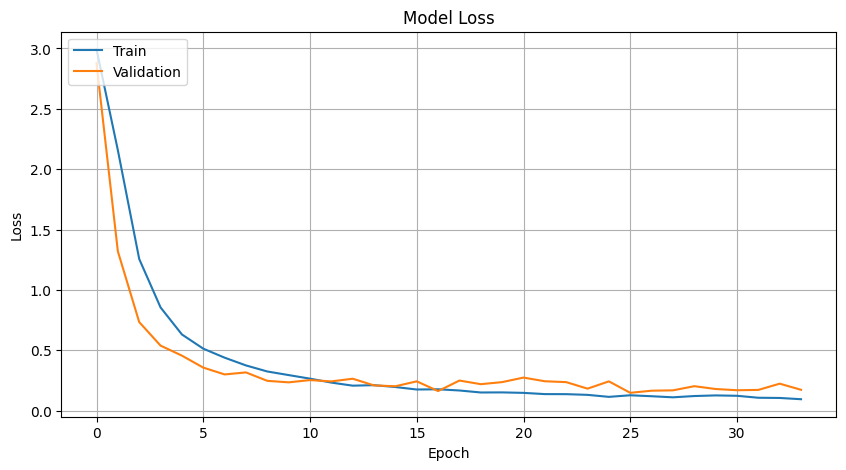

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

Saving na_original_na80.mine3.b.png_008f0a26-71e4-4a2e-a47d-a11a454c1904.png to na_original_na80.mine3.b.png_008f0a26-71e4-4a2e-a47d-a11a454c1904 (4).png
Saving na_original_na80.mine3.b.png_63f17ed4-e294-412c-ac6e-7acb24f39eaa.png to na_original_na80.mine3.b.png_63f17ed4-e294-412c-ac6e-7acb24f39eaa (4).png
Saving na_original_na80.mine3.b.png_623ab5b1-d812-44e6-87a4-8864316ea58e.png to na_original_na80.mine3.b.png_623ab5b1-d812-44e6-87a4-8864316ea58e (4).png
Saving na_original_na80.mine3.png_2d04f629-7a9a-4293-ad9a-4858553b41ef.png to na_original_na80.mine3.png_2d04f629-7a9a-4293-ad9a-4858553b41ef (4).png
Saving na_original_na80.mine3.png_51bd6da7-418d-4b43-a31e-805d6c99b840.png to na_original_na80.mine3.png_51bd6da7-418d-4b43-a31e-805d6c99b840 (4).png
Saving na_original_na80.mine3.png_61cef463-26da-40b3-a570-15f74c5a430f.png to na_original_na80.mine3.png_61cef463-26da-40b3-a570-15f74c5a430f (4).png
Saving na_original_na80.mine3.png_c51e1f4b-63e9-4105-bd5e-c2b1c481a897.png to na_origina

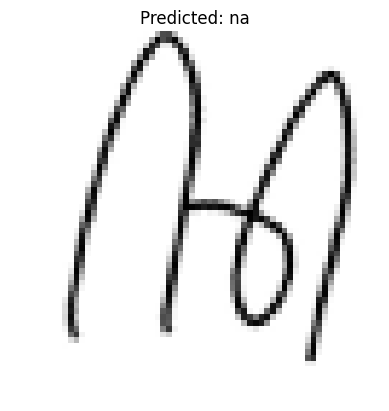

na_original_na80.mine3.b.png_008f0a26-71e4-4a2e-a47d-a11a454c1904 (4).png
na
1/1 [==============================] - 0s 33ms/step


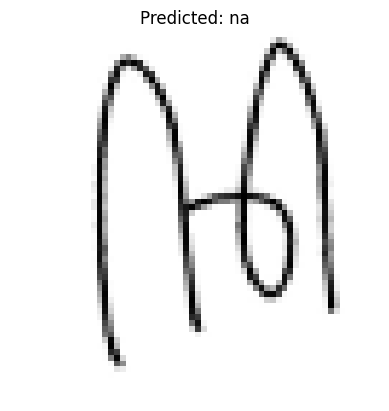

na_original_na80.mine3.b.png_63f17ed4-e294-412c-ac6e-7acb24f39eaa (4).png
na
1/1 [==============================] - 0s 39ms/step


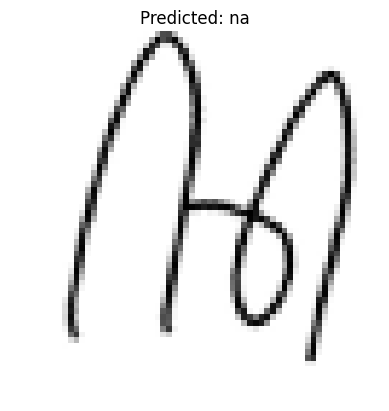

na_original_na80.mine3.b.png_623ab5b1-d812-44e6-87a4-8864316ea58e (4).png
na
1/1 [==============================] - 0s 39ms/step


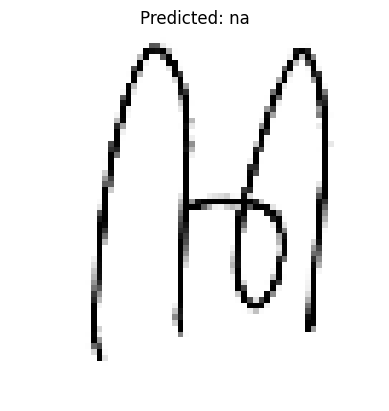

na_original_na80.mine3.png_2d04f629-7a9a-4293-ad9a-4858553b41ef (4).png
na
1/1 [==============================] - 0s 47ms/step


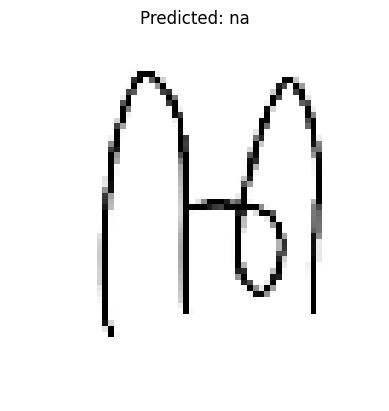

na_original_na80.mine3.png_51bd6da7-418d-4b43-a31e-805d6c99b840 (4).png
na
1/1 [==============================] - 0s 39ms/step


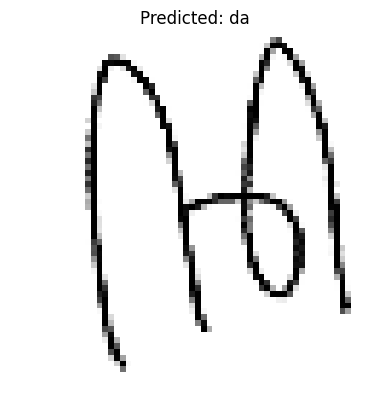

na_original_na80.mine3.png_61cef463-26da-40b3-a570-15f74c5a430f (4).png
da
1/1 [==============================] - 0s 34ms/step


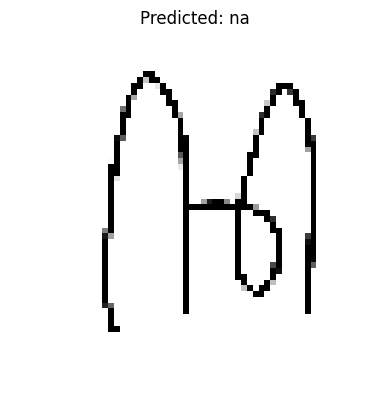

na_original_na80.mine3.png_c51e1f4b-63e9-4105-bd5e-c2b1c481a897 (2).png
na
1/1 [==============================] - 0s 43ms/step


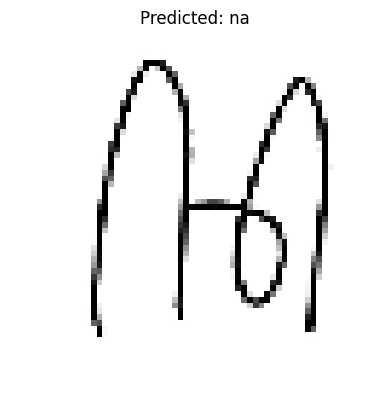

na_original_na80.mine3.png_fcc099d3-aaf7-48fc-bc13-4512910507b1 (2).png
na
1/1 [==============================] - 0s 29ms/step


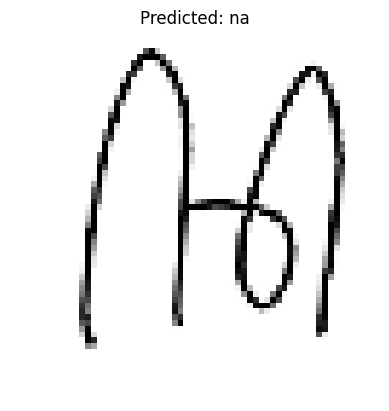

na_original_na80.mine3.r5.png_8d835327-ac57-491a-bc39-9aee2d1f3550 (2).png
na
1/1 [==============================] - 0s 23ms/step


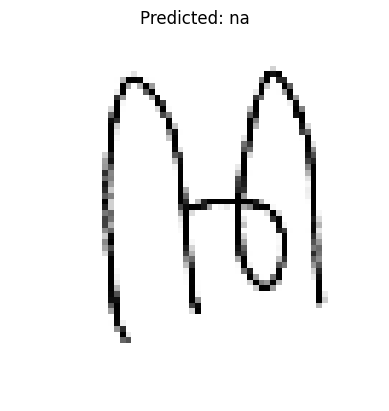

na_original_na80.mine3.r5.png_27c7de0e-f1a0-4491-9abb-74a5bf215f13.png
na
1/1 [==============================] - 0s 28ms/step


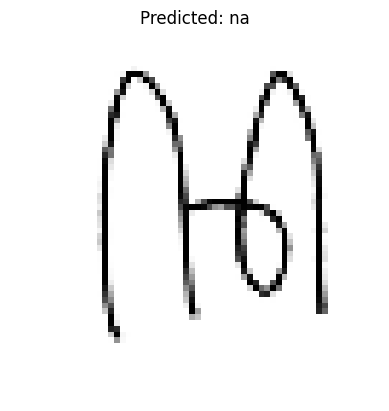

na_original_na80.mine3.r5.png_6534a791-18e1-4ad2-8f9a-5fc954e619c7.png
na
1/1 [==============================] - 0s 34ms/step


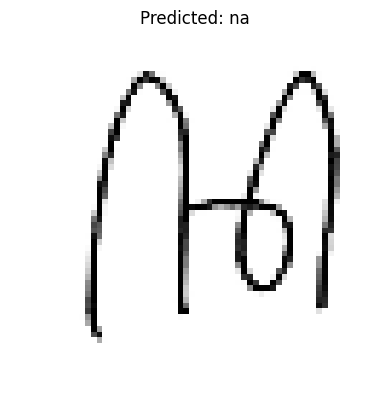

na_original_na80.mine3.r5.png_fa9eac0a-fe44-48fe-aa77-f8380dfdc410.png
na


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

# Define the class labels
class_labels = {0: 'ba', 1: 'ca', 2: 'da', 3: 'dha', 4: 'ga', 5: 'ha', 6: 'ja', 7: 'ka', 8: 'la', 9: 'ma',
                10: 'na', 11: 'nga', 12: 'nya', 13: 'pa', 14: 'ra', 15: 'sa', 16: 'ta', 17: 'tha', 18: 'wa', 19: 'ya'}

# Upload images
uploaded = files.upload()

# Iterate over the uploaded files
for fn in uploaded.keys():
    # Load and preprocess the image
    path = fn
    img = image.load_img(path, target_size=(64, 64), color_mode='grayscale')  # Convert to grayscale
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Stack images
    images = np.vstack([x])

    # Predict the class of the image
    classes = cnn.predict(images, batch_size=10)

    # Get the index of the predicted class
    predicted_class_index = np.argmax(classes, axis=1)[0]

    # Get the class label
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and the predicted label
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    print(fn)
    print(predicted_class_label)

Saving 4693439601225045062_base64_38.png to 4693439601225045062_base64_38.png
1/1 [==============================] - 0s 23ms/step


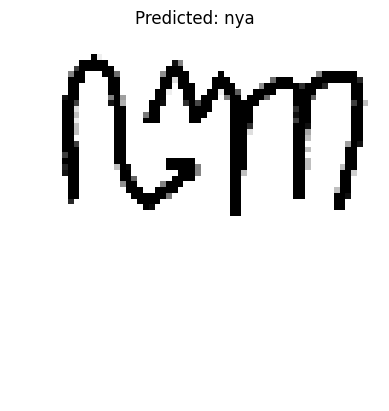

4693439601225045062_base64_38.png
nya


In [ ]:
# Upload images
uploaded = files.upload()

# Iterate over the uploaded files
for fn in uploaded.keys():
    # Load and preprocess the image
    path = fn
    img = image.load_img(path, target_size=(64, 64), color_mode='grayscale')  # Convert to grayscale
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Stack images
    images = np.vstack([x])

    # Predict the class of the image
    classes = cnn.predict(images, batch_size=10)

    # Get the index of the predicted class
    predicted_class_index = np.argmax(classes, axis=1)[0]

    # Get the class label
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and the predicted label
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    print(fn)
    print(predicted_class_label)

Saving Screenshot 2024-06-29 215212.png to Screenshot 2024-06-29 215212.png
1/1 [==============================] - 0s 26ms/step


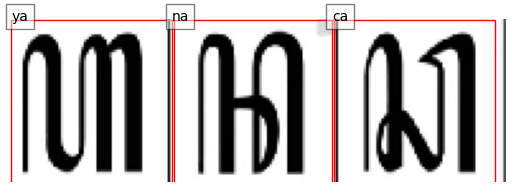

Screenshot 2024-06-29 215212.png
ya
ca
na


In [ ]:
# Upload images
uploaded = files.upload()

# Sliding window parameters
window_size = 64
step_size = 63

# Iterate over the uploaded files
for fn in uploaded.keys():
    # Load and preprocess the image
    path = fn
    img = image.load_img(path, target_size=(64, 195), color_mode='grayscale')  # Convert to grayscale
    img_array = image.img_to_array(img)

    detected_positions = []
    detected_labels = []

    # Sliding window
    for y in range(0, img_array.shape[0] - window_size + 1, step_size):
        for x in range(0, img_array.shape[1] - window_size + 1, step_size):
            window = img_array[y:y + window_size, x:x + window_size]
            window = np.expand_dims(window, axis=0)

            # Predict the class of the window
            classes = cnn.predict(window)
            predicted_class_index = np.argmax(classes, axis=1)[0]
            predicted_class_label = class_labels[predicted_class_index]

            if np.max(classes) > 0.5:  # Only consider confident predictions
                detected_positions.append((x, y))
                detected_labels.append(predicted_class_label)

    # Display the image and the detected bounding boxes
    plt.figure()
    plt.imshow(img, cmap='gray')

    for (x, y), label in zip(detected_positions, detected_labels):
        plt.gca().add_patch(plt.Rectangle((x, y), window_size, window_size, edgecolor='red', facecolor='none'))
        plt.text(x, y, label, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

    print(fn)
    for label in set(detected_labels):
        print(label)

Saving ca_original_ca81.mine3.b.png_410af4c7-985e-482b-8739-dba92d835449.png to ca_original_ca81.mine3.b.png_410af4c7-985e-482b-8739-dba92d835449 (1).png
Saving ja_original_ja91.mine3.b.png_702f72ea-d2f4-424c-9d2f-e286e5d93a6c.png to ja_original_ja91.mine3.b.png_702f72ea-d2f4-424c-9d2f-e286e5d93a6c.png
Saving na_original_na80.mine3.b.png_623ab5b1-d812-44e6-87a4-8864316ea58e.png to na_original_na80.mine3.b.png_623ab5b1-d812-44e6-87a4-8864316ea58e (5).png
Saving sa_original_sa86.mine3.r5.png_fe2c507b-6123-4899-a513-a6184e6c1712.png to sa_original_sa86.mine3.r5.png_fe2c507b-6123-4899-a513-a6184e6c1712 (1).png
Saving wa_original_wa9.mine.png_e12c81c9-bae5-40bf-92b8-628f4a64c012.png to wa_original_wa9.mine.png_e12c81c9-bae5-40bf-92b8-628f4a64c012 (1).png
Please verify and reorder the files if necessary:
1. ca_original_ca81.mine3.b.png_410af4c7-985e-482b-8739-dba92d835449 (1).png
2. ja_original_ja91.mine3.b.png_702f72ea-d2f4-424c-9d2f-e286e5d93a6c.png
3. na_original_na80.mine3.b.png_623ab5b1

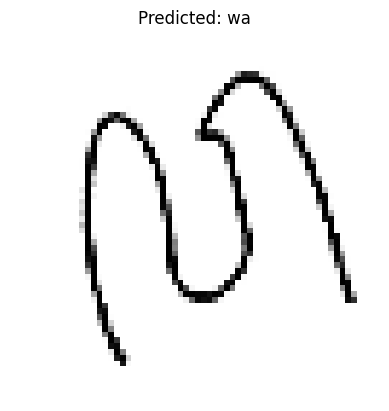

wa_original_wa9.mine.png_e12c81c9-bae5-40bf-92b8-628f4a64c012 (1).png
wa
1/1 [==============================] - 0s 27ms/step


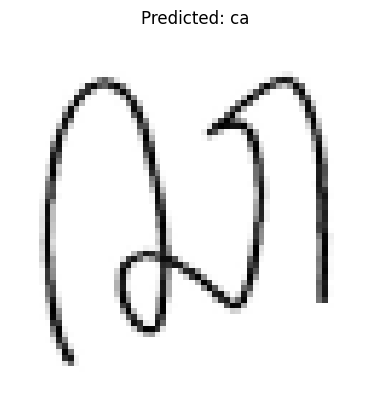

ca_original_ca81.mine3.b.png_410af4c7-985e-482b-8739-dba92d835449 (1).png
ca
1/1 [==============================] - 0s 27ms/step


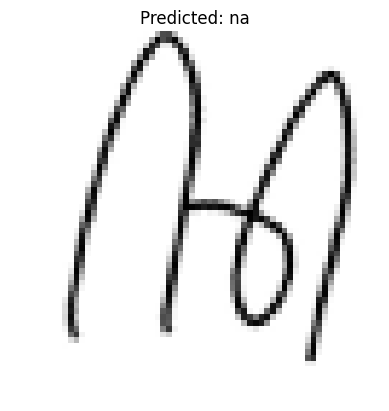

na_original_na80.mine3.b.png_623ab5b1-d812-44e6-87a4-8864316ea58e (5).png
na
1/1 [==============================] - 0s 33ms/step


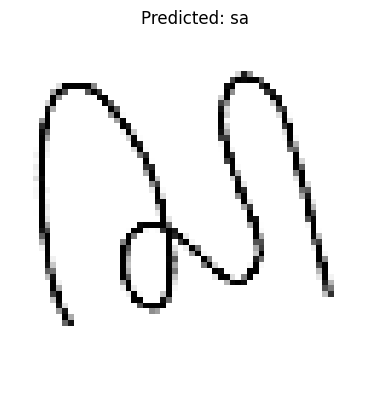

sa_original_sa86.mine3.r5.png_fe2c507b-6123-4899-a513-a6184e6c1712 (1).png
sa
1/1 [==============================] - 0s 23ms/step


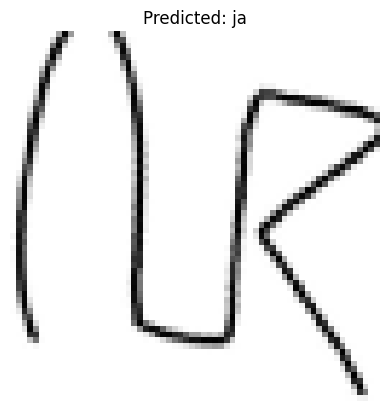

ja_original_ja91.mine3.b.png_702f72ea-d2f4-424c-9d2f-e286e5d93a6c.png
ja
Predicted Labels:  ['wa', 'ca', 'na', 'sa', 'ja']


In [ ]:
# Upload images
uploaded = files.upload()

# Get the ordered list of filenames
uploaded_files = list(uploaded.keys())

# Ask user to verify and reorder the files if necessary
print("Please verify and reorder the files if necessary:")
for i, fn in enumerate(uploaded_files):
    print(f"{i+1}. {fn}")

print("Enter the new order of files as comma-separated indices (e.g., 2,1):")
new_order = input()
new_order_indices = [int(x) - 1 for x in new_order.split(',')]
uploaded_files = [uploaded_files[i] for i in new_order_indices]

# Initialize a list to store the predicted labels in order
predicted_labels = []

# Iterate over the uploaded files
for fn in uploaded_files:
    # Load and preprocess the image
    path = fn
    img = image.load_img(path, target_size=(64, 64), color_mode='grayscale')  # Convert to grayscale
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict the class of the image
    classes = cnn.predict(x, batch_size=10)

    # Get the index of the predicted class
    predicted_class_index = np.argmax(classes, axis=1)[0]

    # Get the class label
    predicted_class_label = class_labels[predicted_class_index]

    # Append the predicted label to the list
    predicted_labels.append(predicted_class_label)

    # Display the image and the predicted label
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    print(fn)
    print(predicted_class_label)

# Print all predicted labels in order of upload
print("Predicted Labels: ", predicted_labels)